In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [5]:
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [3]:
na_column = ['num_cylinders', 'horsepower', 'acceleration', 'num_doors']
df[na_column] = df[na_column].fillna(0)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [5]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [6]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [7]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [9]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
dt1 = DecisionTreeRegressor(max_depth=1)
dt1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [22]:
print(export_text(dt1, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [24]:
dt2 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
dt2.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_val_pred = dt2.predict(X_val)
rmse2 = root_mean_squared_error(y_val, y_val_pred)
print(rmse2)

0.4595777223092726


In [26]:
rmse3_list = []
for n in range(10, 200, 10):
    dt3 = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    dt3.fit(X_train, y_train)

    y_pred = dt3.predict(X_val)
    rmse3 = root_mean_squared_error(y_val, y_pred)
    rmse3_list.append({'n_estimators': n, 'rmse': rmse3})

In [30]:
[round(r, 3) for r in rmse3_list]

[0.46,
 0.454,
 0.452,
 0.449,
 0.447,
 0.445,
 0.445,
 0.445,
 0.445,
 0.445,
 0.444,
 0.444,
 0.444,
 0.443,
 0.443,
 0.443,
 0.443,
 0.442,
 0.442]

In [35]:
max_depth_list = [10, 15, 20, 25]
rmse4_list = []

for d in max_depth_list:
    for n in range(10, 200, 10):
        dt4 = RandomForestRegressor(n_estimators=n, max_depth=d,random_state=1)
        dt4.fit(X_train, y_train)

        y_pred = dt4.predict(X_val)
        rmse4 = root_mean_squared_error(y_val, y_pred)
        rmse4_list.append({'max_depth': d, 'n_estimators': n, 'rmse': rmse4})

In [36]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(rmse4_list)

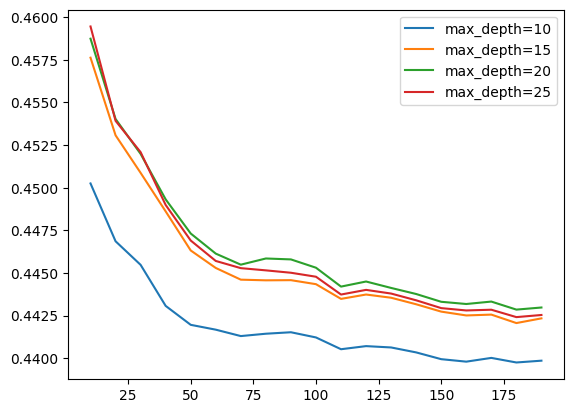

In [37]:
for d in max_depth_list:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [12]:
dt5 = RandomForestRegressor(n_estimators=10, max_depth=20,random_state=1, n_jobs=-1)
dt5.fit(X_train, y_train)

y_pred = dt5.predict(X_val)
rmse5 = root_mean_squared_error(y_val, y_pred)



array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [13]:
feature_names = dv.get_feature_names_out()
importances = dt5.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [14]:
feature_importance_df

,feature,importance
13,vehicle_weight,0.959150
6,horsepower,0.015998
0,acceleration,0.011480
3,engine_displacement,0.003273
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635
12,origin=USA,0.000540
11,origin=Europe,0.000519
10,origin=Asia,0.000462


In [15]:
import xgboost as xgb

In [16]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [25]:
xgb_params_1 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_params_2 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [27]:
for xgb_params in [xgb_params_1, xgb_params_2]:
    model = xgb.train(xgb_params, dtrain, num_boost_round=100)

    y_pred = model.predict(dval)
    rmse6 = root_mean_squared_error(y_val, y_pred)
    print(xgb_params['eta'], rmse6)

0.3 0.45017755678087246
0.1 0.42622800553359225
